Contact: [Chris Pankow](mailto:chris.pankow@ligo.org)

# References

1. Probability Theory / Bayesian Methods

    1. Introduction to Probability and Its Applications (2nd ed.), Richard L. Scheaffer [Amazon](http://www.amazon.com/Introduction-Probability-Its-Applications-Statistics/dp/0534237908/ref=sr_1_2?ie=UTF8&qid=1426086883&sr=8-2&keywords=Richard+Scheaffer+%2Bintroduction)
    2. http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb

1. Probability Theory / Matched Filtering

    2. Gravitational-Wave Physics and Astronomy, Anderson and Creighton [Amazon](http://www.amazon.com/Gravitational-Wave-Physics-Astronomy-Introduction-Experiment/dp/352740886X/ref=sr_1_1?ie=UTF8&qid=1426087323&sr=8-1&keywords=gravitational+wave+physics+and+astronomy)

1. Matched Filtering / Gravitational-Wave Data Analysis

    3. Gravitational-Wave Physics and Astronomy, Anderson and Creighton [Amazon](http://www.amazon.com/Gravitational-Wave-Physics-Astronomy-Introduction-Experiment/dp/352740886X/ref=sr_1_1?ie=UTF8&qid=1426087323&sr=8-1&keywords=gravitational+wave+physics+and+astronomy)
    4. Gravitational Waves (vol. 1), Michele Maggiore [Amazon](http://www.amazon.com/Gravitational-Waves-1-Theory-Experiments/dp/0198570740/ref=sr_1_1?ie=UTF8&qid=1426089182&sr=8-1&keywords=gravitational+waves+maggiore)
    5. Search for Gravitational-Wave Radiation from Binary Black Hole MACHOs in the Galactic Halo (Ph.D. thesis), Duncan A. Brown [arXiv](http://arxiv.org/pdf/0705.1514v1.pdf)
    
1. Markov Chain Monte Carlos:

    6. http://arxiv.org/pdf/1202.3665.pdf
    7. emcee, a python MCMC integrator: http://www.people.fas.harvard.edu/~plam/teaching/methods/mcmc/mcmc_print.pdf

## Statement of the Problem

We seek to answer the following question:

*How do I optimally search for a signal in noise, given that the signal and the noise can be modeled with a finite number of model parameters*

From here on out, I'll describe model parameters with $\vec{\mu}$. Note that this set of parameters is *model specific*, that is if I change my model (e,g. change how the signal is generated from the model), the parameters will not give the same realization of the signal. You find that difference academic, but recall we do not have a complete and accurate description of a gravitational radiation waveform from a binary inspiral, so even little differences in how we approximate certain processes can amount to a completely different description of the signal. We'll see later how we can use that to our advantage in terms of ''model selection''.

The one added complication here is that the noise, while describable with a finite set of parameters, is not a fixed number itself. We only get realizations of the underlying random process which creates the noise. We call one measurement of this distribution a _noise realization_. Therefore, we've launched ourselves out of the realm of deterministic equations and into probability theory. Each statement we make will be probabilitstic because we do not know a priori what noise realization we will obtain: we can only give a distribution of values that we are likely to obtain.

## Bayes' Law

Questions that follow the form, 'How do I obtain A given a set of data described by B' are the bread and butter of Bayesian statistics. So, let's start off axiomatically. Here's Bayes's Law:

$$P(A|B) = \frac{P(B|A)P(A)}{\sum_i P(B|A_i)P(B)}$$

I've written the denominator out so as to refer to it later. The sum is replaced by an integral when the $A_j$ goes from discrete to continuous. A slightly more convenient form is given as:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

It says, in words, the probability of $A$ given that $B$ is true is equal to the probability of $B$ being true given $A$ weighted by the probability of $A$ and normalizated by the probability of $B$. You can do a quick (though somewhat circular) proof of this just by taking the ratio of two conditional probabilities $P(A) = P(B$ and $A)/P(B)$. This image might be a helpful guide:

<a title="By Gnathan87 (Own work) [CC0], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AProbability_tree_diagram.svg"><img width="256" alt="Probability tree diagram" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Probability_tree_diagram.svg/256px-Probability_tree_diagram.svg.png"/></a>

Note the $\cap$ symbol means "intersection" and is equivalent to the "and" operator in set or logic theory.

> Example: The Monty Hall Problem
>
> You are a contestant on a game show and presented with three doors, behind which one is a new car that you will win should you pick the correct door. You select one door. Before you are able to open the door, the host of this crazy TV game show opens one of the doors to reveal that it does *not* have the car behind it.
>
> He/she then asks, do you want to change your choice? Should you choose a different door?
>
> The answer is actually, surprisingly, yes. The leap of logic, however is that Monty is not allowed to open a door which reveals a car.
>
> The set up is as follows. The probability of a car being behind a given door is $P(C_i)=1/3$ with $i$ indexing the door. The conditional probability that the car is behind a given door given your selection is $P(C_i|S_j)=1/3$ -- e.g. no additional information. Once selected, initially $P(C_i|S_j)=1/3$ for a $j$ which is now *fixed*. For concreteness, say $j=3$ (you selected door 3). You can permute these all around and still get the same answer. The question to ask is
>
> _Is $P(C_3|C_{h,1},S_3) > P(C_2|C_{h,1},S_3)$?_ In other words, given he opened door 1, is the probability greater that the door I *want* to open greater than the one that was not selected by either.
>
> The probability that the host will select a 'pre-reveal' door given your choices are as follows:
>
> $P(C_{h,1}|C_1,S_3) = 0$ -- in other words, he won't open the door with the car behind it.
>
> $P(C_{h,1}|C_2,S_3) = 1$ -- in other words, you selected the wrong door, but he can't open the door with the car behind it, so he can only select door 1
>
> $P(C_{h,1}|C_3,S_3) = 1/2$ -- in other words, you selected the right door, and he can open either of the other two. So, if he selects door 1, Bayes' Law looks like this:
>
> $$P(C_2|C_{h,1},S_3) = \frac{P(C_{h,1}|C_2,S_3)P(C_2|S_3)}{P(C_{h,1}|S_3)}$$
>
> or really like this:
>
> $$P(C_2|C_{h,1},S_3) = \frac{P(C_{h,1}|C_2,S_3)P(C_2|S_3)}{\sum_i P(C_{h,1}|C_i,S_3)}$$
>
> Expanding out the denominator gives you a term like $P(C_{h,1}|C_i,S_1)P(C_i|S_1)$ for each term in the sum, for which we've pointed is $P(C_i|S_1)=1/3$ in all cases. You have a factor of this in the numerator as well, so these things cancel. The denominator is then the sum of the enumerated probabilities above and the numerator is the probability 1 case above.
>
> $$P(C_2|C_{h,1},S_3) = \frac{1}{1+1/2+0} = 2/3$$
>
> And the probability for door 3 is:
>
> $$P(C_3|C_{h,1},S_3) = \frac{1/2}{1+1/2+0} = 1/3$$
>
> So, with greater probability you should switch to door 2 (or really, the other door). This is really a statement that the host has provided more information, and Bayes' Law is a mathematical way to express how the extra information affects your posterior belief in the outcomes. Do note that you could still be wrong. Just on average, you do better by switching. All the extra information is encoded in the fact that Monty *knows* which door the car is behind, and so he's helping you out by providing it.

Of course, you'd have to rethink this if the other two doors contained unwanted surprises, like fire hoses and a visit from the dentist:

<img src="http://fc01.deviantart.net/fs11/i/2006/254/4/c/Monty_Hall_by_shelim.png">
"I'm almost positive that there are no man eating komodo dragons behind these doors. You still wanna make a deal!?"


## Hypothesis Testing

This is all well and good, but how does one actually use this. Well, as we had just posited, we have a quesiton that we want to determine A given B. Let's assign meaning to this. I want to know the probability of obtaining a signal ($h$) with parameters $\vec{\mu}$ with a given data which contains a possible *true* signal ($h_0$) and a parameterized but otherwise unspecified noise model $n$. Strictly speaking, we can assign two hypothesis:

$H_0$: The _null_ hypothesis. The data contains only noise, not a signal. This statement is, physically speaking, equivalent to having a signal present with an amplitude of 0, but the distinction between this and the signal $A=0$ hypothesis is subtle and I'm going to overlook it.

$H_1$: The data contains noise (parameterized is the *same* way as $H_0$) *and* a non-zero amplitude signal $h_0$ (with parameters $\vec{\mu_0}$ which I wish to detect.

In plainer terms, we're searching for a signal in randomized noise and we want to quantify things about that signal using probability distributions. What we measure, and can use to do inference about the parameters is a data set $D$: it's our "truth".Ultimately, we're looking for the _posterior_: the probability $p(\vec{\mu},H_1|D)$. On the way, we're going to learn about matched filtering because it becomes a natural component of this analysis. Let's insert these realities into the problem:

$$p(\vec{\mu},H_1|D) = \frac{p(\vec{\mu},H_1)p(D|\vec{\mu},H_1)}{p(D)}$$

Let's break it down:

$p(D)$: This is the probability of obtaining a given data set $D$. Let's simplify the analysis here. We just said we must be able to  parameterize the noise model. While there are many ways to do this, the most simplifying assumption we can make is that the noise are independent samples drawn from a Gaussian distribution with the same mean $\mu$ (not to be confused with our signal parameters) and variance $\sigma^2$. Therefore getting a certain realization of noise is a time series of independent Gaussian variables, and the probability of obtaining the series in general is:

$$p(D) \propto \prod_i^N \exp(-(x_i-\mu)^2/2/\sigma^2)$$

As an aside: we can efficiently represent this as an inner product. You might recall this notation from quantum mechanics: (X|Y). For properly normalized quantities, (X|X) = 1. You might also recall the expectation value of an operator, defined as (X|O|Y). In all further discussion, when I write (X|Y), it's implied that the inner product is done in the frequency domain, and the implied operator is a weighting function, in this case the power spectral density. There's all kinds of subtleties and derivations I'm not even going into here. Just know that Gaussian random variables in the time domain are also Gaussian random variables in the frequency domain. Just remember that (D|D) is still the product of the Gaussian probabilities. So, I'm going to write this a little more compactly:

$$p(D) \propto \exp(-(D|D)/2)$$

Further note that this is also the posterior probability for $p(H_0|D)$.

$p(\vec{\mu},H_1)$: Read aloud, this would be, "the probability of obtaining a parameter set realization $\mu$ under the $H_1$ hypothesis. This needs careful thought. Several competing models (or hypothesis) $H_n$ can (and often will) have the same parameter labels. Some may include more, some less. In this case we are _quantifying our belief in the hypothesis_ $H_1$ by assigning it a probability to occur under this hypothesis. This quantity is called the _prior_: it quantifies, in some way, the underlying distirbution of the parameters themselves. It's affected by our present knowledge and belief in the physics and astronomy.

### Brief digression: priors

Let's take a digression and examine something concrete.

In the case where we have no pre-existing knowledge or belief in a certain parameter, we can assign it an ['uninformative' prior](https://en.wikipedia.org/wiki/Prior_probability#Uninformative_priors): usually a uniform distribution (though you can construct [others](https://en.wikipedia.org/wiki/Jeffreys_prior). There is some danger in the details here since the uniform distribution still affects the shape of the posterior by imposing limits on range of values. There's a lot to consider here, but in our case we're going to gloss over these.

Let's do a brief example of a more physical case. Given the current state of thought on cosmology and the distribution of matter in the universe, we are relatively ocnfident that in broad terms, the distribution of compact objects in the universe is isotropic. This is true up to effects from cosmology (e.g. an expanding universe). We do not expect to be able to see this effect with advanced LIGO, so it's safe to say our sources are isotropic in the *nearby* universe. So if one of the parmaeters we wish to maesure is the _distance_ to the binary, then we must assign it a prior. We just stated that the sources are isotropically distributed in the nearby universe, so the _distribution_ of distance parameters (encoded in the waveform signal as $1/d$ and usually related intrinsically to the amplitude of the signal when detected) if we could measure all of them exactly would be proportional to $d^2$. E.g.:

$$p(d) \propto d^2$$

Integrating this prior to normalize it means imposing a cutoff distance, since the integral would not converge ar $d=\infty$. We again appeal to common sense, because we know that our instruments cannot possibly detect signals beyond a certain range (if we believe nominal models of signal generation), so as long as we put our fiducial cutoff beyond this radius, we have not significantly biased ourselves.

As you can see, selection of the prior has both subtle and gross effects on the shape of your posterior, and it's important to understand the basic physics and major assumptions which make up your model and hypothesis. Of course, if you question any of the underpinned assumptions here, you could create a *new* hypothesis to test *that* assumption. Say it with me: "All hail Rev. Bayes!"

<a title="See page for author [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AThomas_Bayes.gif"><img width="256" alt="Thomas Bayes" src="//upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif"/></a>"S'up?"

## Matched Filtering

Before continuing, I've neglected a full description of $D$ under our two hypotheses.

$$H_0\rightarrow D(f) = n(f)$$
$$H_1\rightarrow D(f) = n(f)+h(f;\vec{\mu})$$

That is to say, $D$ in the frequency domain is purely Gaussian noise under $H_0$ and Gaussian noise plus a signal $h(f)$ under $H_1$. We neglected to describe one term in the above Bayesian' formula, and we're in a position to do that effectively now, so let's do it:

$p(D|\vec{\mu},H_1)$: The probability that the data contains a signal with hypothesis $H_1$. This is:

$$p(D) \propto \exp(-(D-h(\vec{\mu})|D-h(\vec{\mu})/2)$$

That is to say: when I subtract off my putative signal from the data, do I obtain my noise model back? More specifically, are the residuals consistent with the $H_0$ hypothesis? This motivates us to do some trickery (really... like I need a motivation to sweep things under the rug). If I divide both sides of the ratio by $p(H_0|D)$, I have:

$$p(\vec{\mu},H_1|D) = \frac{p(\vec{\mu},H_1)p(D|\vec{\mu},H_1)/p(D|H_0)}{p(D)/p(D|H_0)}$$

Recall from first digression (the one about $A=0$) that we didn't make a distinction between a parameter set which would give us only noise back, and the hypothesis of only noise. That gives us leave (though not a lot) to write the overall denominator of the ratio as

$$Z=\frac{p(D|H_1)}{p(D|H_0)}$$

and I've played a little fast and loose here with the $H_1$ and $H_0$ labels. You might be able to convince yourself that none of this matters too much since the quantities that involve $H_1$ invariably also have $\vec{\mu}$ dependence, so the quantities that involve $H_0$ only concern themselves with the *noise* which we are not so interested in. In effect, we're dividing out the contribution to the ratio of the noise as much as we can. 

Not accounting for the prior which remains unchanged, we can expand out the meaning of the ratio in the numerator:

$$\Lambda(\vec{\mu})=\frac{p(D|\vec{\mu},H_1)}{p(D|H_0)}=\exp(-(h(\vec{\mu})|D)-(h(\vec{\mu})|h(\vec{\mu}))/2)$$

This is called the *likelihood ratio*. It is, in some manner of speaking, the fundamental quantity we manipulate and calculate when doing data analysis. It is a direct comparison of probability that a signal is present versus the probability it is not. In the case where $h$ is a given, e.g. it is fixed, the measurement to be made is the data with the known model $(h|D)$. Inner products have a maximum when the two entities are identical. Recall $(h|h)$ is simply a constant, in effect, this says that when one wants to search for a given signal $h$ in data $D$, the optimal way to do so is to take the inner product of the data with the signal. This is called _matched filtering_.

> Example -- Matched Filtering
>
> We're going to do a very simple example of matched filtering. I'm going to generate an inspiral signal, add it to some noisy data, 
> then do an exact match for in the noise. Note that I've ignored all sorts of aperiodicty effects, normalization issues, and time
> shifts of the data to get the correct time of arrival. I've also neglected doing a matched filter for the full waveform, and have 
> not included any sort of geometric effects (e.g. the resposne of an instrument to a gravitational wave)
>
> Note: you can play with quantities like the noise variance and the signal parameters (try moving the distance in and out) and see
> what effect this has on the filtering!

In [2]:
# Imports and settings
%matplotlib inline
import numpy
import matplotlib
from matplotlib.pyplot import *
import lal
import lalsimulation
import matplotlib

numpy.random.seed(0)

In [3]:
# Other useful knobs
# spacing in the time domain --- this is the inverse of our sampling rate
delta_t = 1.0/4096 # s
low_freq = 40 # Hz --- lowest accessible frequency in the waveform

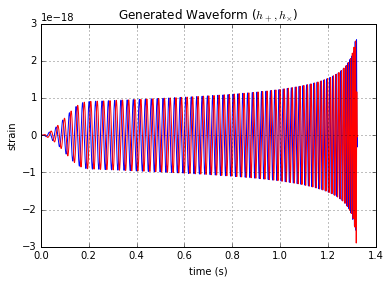

In [4]:
#
# Generate our signal
#
def gen_wave(mass1, mass2):
    # this is the method we use to describe the incoming waveform
    # TaylorT4 = Taylor expanded Einstein's equations, time domain -- inspiral only
    approximant = lalsimulation.GetApproximantFromString("TaylorT4")
    # Distance to the source (SI units of meters, but its convenient to input in Mpc)
    distance = 1/20.0 * lal.PC_SI * 1e6
    hp, hx = lalsimulation.SimInspiralTD(0, delta_t, # reference phase, delta_t
                                          mass1 * lal.MSUN_SI, mass2 * lal.MSUN_SI, # primary, secondary mass (kg)
                                          0, 0, 0, # primary spin vector (cartesian)
                                          0, 0, 0, # secondary spin vector (cartesian)
                                          low_freq, 0, # minimum frequency, reference frequency
                                          distance, # distance (m)
                                          0, 0, # redshift, inclination (face on)
                                          0, 0, # tidal terms
                                          None, # waveform flags
                                          None, # non-GR flags
                                          -1, 7, approximant # amplitude order, phase order, approximant
                                          )
    return hp, hx

hp, hx = gen_wave(10, 10)

t = numpy.arange(len(hp.data.data))*delta_t
plot(t, hp.data.data, 'b-')
plot(t, hx.data.data, 'r-')
grid()
xlabel("time (s)")
ylabel(r"strain")
title(r"Generated Waveform ($h_+, h_{\times}$)")

Generated 65536 samples (16.000000 seconds) of random noise
6.89500439566 28241
Will insert the signal 28241 samples into the data


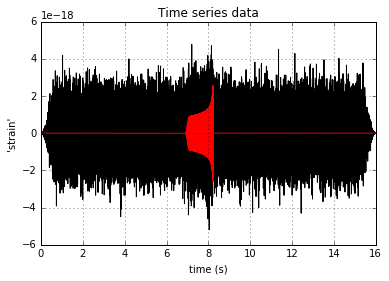

In [102]:
#
# Generate our noise
#
# Of course, LIGO noise looks different. We could actually generate that if we wanted to (there's many functions in lalsuite)
# to do so. However, I'm going to just use a flat spectra with a relative amplitude that is "close" to the strain amplitude.
# This allows me to ignore the normalization of the template itself because the weighting in the inner product doesn't change
# the waveform, it just ends up being a constant.
#
# Zero mean, with a standard deviation of something near the amplitude scale of the waveform --- just ad hoc, really
data_len = 16. # s
data_len_samp = int(data_len/delta_t)
noise = numpy.random.normal(0, 1e-18, data_len_samp)
print "Generated %d samples (%f seconds) of random noise" % (data_len_samp, data_len)

sig_len_samp = len(hp.data.data)
sig_len = sig_len_samp * delta_t

# choose a random 'time of arrival' --- keep it somewhere near center
#t_0 = int(numpy.random.uniform(len(hp.data.data)*2, 16384-len(hp.data.data)*2))
t_0 = numpy.random.uniform(sig_len*2, data_len-sig_len*2)
t_0_samp = int(t_0/delta_t)
print t_0, t_0_samp
print "Will insert the signal %d samples into the data" % t_0_samp

#
# Superimpose and plot
#
figure()
t = numpy.arange(len(noise))*delta_t
data = noise.copy()
# Only one polarization for now -- there is an efficient way to search for both, but we're not going to address that here.
data[t_0_samp:t_0_samp+len(hp.data.data)] += hp.data.data
# This windows and removes sharp endges
wind = lal.CreateTukeyREAL8Window(len(data), 0.1).data.data
# We'll need the overall normalization later
w_norm = numpy.sqrt(numpy.sum(wind**2)/len(wind))
wind /= w_norm
data *= wind

plot(t, data, 'k-')

signal = noise.copy()
signal *= 0
signal[t_0_samp:t_0_samp+len(hp.data.data)] += hp.data.data
plot(t, signal, 'r-')
grid()
xlabel("time (s)")
ylabel(r"'strain'")
title("Time series data");

### Matched filtering (time domain)

Matched filtering can be done in the time domain, and its representation here is the easiest to understand conceptually. This is the _correlation_ of the model (template) with the data. One *sample* of the correlation can be formulated in the following way:

$$
c_0 = \sum_i h[i] D[i]
$$

Where we've switched to discrete indexing ($x[i]$ is the ith sample of the vector $x$). One has to be careful with how offsets are handled. The above equation implies that the zero'th sample of the template is aligned with the zero'th sample of the data, in other words, you started the template at the beginning of the data, multiplied the two (applying $h[i] \equiv 0$ where $i$ is greater than the number of samples in the template, if applicable), and summed across the product.

As mentioned before, this produces a single sample which corresponds to the correlation at "zero" offset --- what the offset corresponds to is a bit arbitrary, but we'll adjust for the length of the template later. If we want the entire thing, we have to move the template forward by one sample and redo the process. However, note that the data is longer than the template, so we add one to *its* offset instead:

$$
c_1 = \sum_i h[i] D[i+1]
$$

This implies that as we increase the offset, we'll start to drop off the end of the data. That's okay, we'll account for that effect soon enough. In general, we can compute the cross-correlation at any offset by introducing a new dummpy variable:

$$
c_j = \sum_i h[i] D[i+j]
$$

Let's do some work. Numpy has the `correlate` function which will do this for us without worrying about edges and what not.

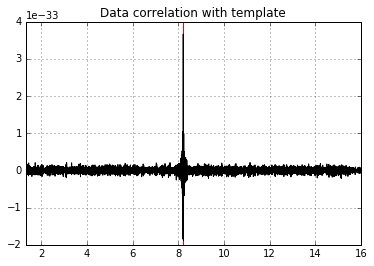

In [103]:
#
# Correlate the data with the signal -- time domain
#
# Note the correlation gives you the time-reversed version, so you have to reverse it
# to get the correct answer. Also note that you fewer samples from the correlation
# since you need a full waveform length of data before you can do a proper multiply-add
figure()
axvline(t_0 + sig_len, color='r')
plot(t[len(hp.data.data)-1:], numpy.correlate(hp.data.data, data)[::-1], 'k-')
xlim([(len(hp.data.data)-1)*delta_t, None])
# Note that the offset corresponds to product of the data at the offset with the *first* sample of the data
# time reversal means we need to mark the end time of the template
title("Data correlation with template")
grid()

### Matched filtering (frequency domain)

While this probably ran almost instantaneously on your computer, in reality, this operation is unnecessarily expensive. We can use the [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem): **composition in the TD is the product in the FD**.

$$
c(\tau) = \int \tilde{h}(f) \tilde{D}^{\ast}(f) \exp(-2\pi\imath f\tau)df
$$

Notice that this is the inverse Fourier transform of the product of the data and the template in the Fourier domain. To introduce some notation, we have the following inner product:

$$
\{a|b\}(\tau) = \int \tilde{a}(f) \tilde{b}^{\ast}(f) \exp(-2\pi\imath f\tau)df
$$

When there's no confusion, if the $\tau$ argument is not present, you can assume that:

$$
\{a|b\} = \max_{\tau} \int \tilde{a}(f) \tilde{b}^{\ast}(f) \exp(-2\pi\imath f\tau)df
$$

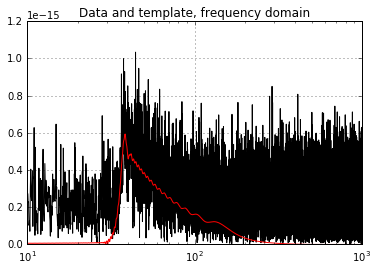

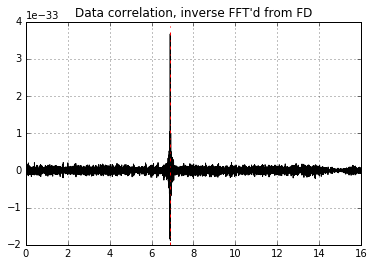

In [134]:
#
# This is a trick to get the convolution faster than a multiply-shift type correlation
# The (D|h) inner product in the frequency domain is equivalent to a convolution in the
# time-domain (see 'Convolution Theorem' for Fourier Transforms)
#

#
# To the frequency domain!
#

# Hermitian symmetry is implied by the input data being real, this ignores the negative frequency components
# We already know how to calculate them from the positive.
data_fd = numpy.fft.fft(data)

# We have to be careful here, because the template is not the same length as the data, so its DFT won't have
# the same resolution. Luckily numpy provides an easy option for this, the second argument is the 'N' to use
# in the DFT. If the input vector doesn't have the correct dimensions, it is zero padded.
tmplt_fd = numpy.fft.fft(hp.data.data, len(data))

# Minimum resolvable frequency resolution.
delta_f = 1.0 / data_len
freq = numpy.fft.fftfreq(len(data), delta_f)

figure()
freq = numpy.arange(len(data_fd)) * delta_f
plot(freq, numpy.abs(data_fd), 'k-')
plot(freq, numpy.abs(tmplt_fd), 'r-')
semilogx()
title("Data and template, frequency domain")
grid()
xlim([10, 1000])

# Product in the frequency domain
data_fd_filtered = data_fd * numpy.conj(tmplt_fd)

# IFFT to get the correlation time series
filter_series = numpy.fft.ifft(data_fd_filtered)

#
# Note that in the plot below we *don't* get the time of arrival correct
# That's because I simply copied the template into a time series at the
# beginning. Had I accounted more carefully for its true time offset
# relative to the data, I could give you better timing information.
# More specifically, had I put the template in the time series exactly
# where it appears in the data, the maximum of the correlation would be
# at t=0.
#
figure()
plot(t, filter_series, 'k-')
title("Data correlation, inverse FFT'd from FD")
axvline(t_0, color='r', linestyle='-.')
grid()

### Noise weighted inner products

In order to continue, I need to define a little more notation. I've ignored a bunch of normalization constants above which will give us a relative strength of signal versus noise. We'll use this a bit later when we come up upon GW150914. First, though, let's define a different inner product: this one is slightly more complicated than above, but is equivalent to weighting the inner product with a kernel. We define the new "noise weighted" inner product:

$$
(a|b)(\tau) = 4 \int_0^{\infty} \frac{\tilde{h}(f) \tilde{D}(f)^{\ast}}{S(f)} \exp(-2\pi\imath f\tau)df
$$

Notice that I've now specified formal limits on the integral. The only difference here is that the product is now weighted by the inverse of a function $S(f)$. This is the power spectral density of the noise. Its formal definition is:

$$
\delta(f-f')S(|f|) = 2 \langle\tilde{D}(f)\tilde{D}(f')\rangle
$$

Note that it's *one sided*. It has a definition only for positive frequencies. The angle brackets indicate a time averaging. The formal definition is a little hard to parse, but this is effectively the autocorrelation of the noise with itself. An example is probably in order:

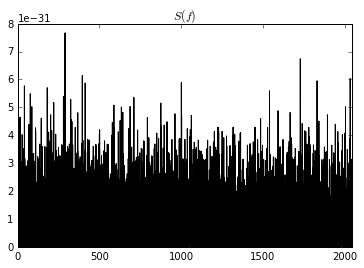

In [169]:
noise_fd = numpy.fft.fft(noise)
psd = numpy.conj(noise_fd) * noise_fd * 4
#psd = matplotlib.mlab.psd(noise)
plot(freq, noise_fd * numpy.conj(noise_fd), 'k-')
xlim(0, 2048)
title(r"$S(f)$") 

Since the input (time domain) noise was Gaussian random variables, the output (frequency domain) is also Gaussian random variables. However, we've taken the absolute value of the output to get the cross correlation as a function of frequency (that's the $\delta(f-f')$ above) and so everything is now positive definite. In this case, the result is actually a $\chi^2$ distribution (albeit with a non-centrality parameter).

Reference signal to noise ratio 17.624193


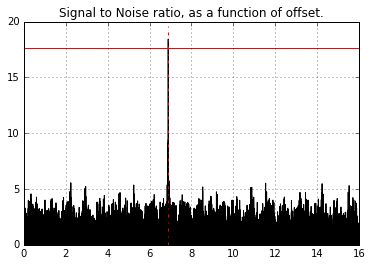

In [170]:
# FIXME: Fudge factors:
# 1. Multiplying the ifft by 2 f_N

# Reference signal to noise ratio:
snr_ref = numpy.sum(numpy.abs(tmplt_fd)**2 / psd)
snr_ref = numpy.sqrt(numpy.abs(snr_ref) * delta_f)
print "Reference signal to noise ratio %f" % snr_ref

# Product in the frequency domain
data_fd_filtered = data_fd * numpy.conj(tmplt_fd) / psd

# IFFT to get the correlation time series
filter_series = numpy.fft.ifft(data_fd_filtered) * 4096

#
# Note that in the plot below we *don't* get the time of arrival correct
# That's because I simply copied the template into a time series at the
# beginning. Had I accounted more carefully for its true time offset
# relative to the data, I could give you better timing information.
# More specifically, had I put the template in the time series exactly
# where it appears in the data, the maximum of the correlation would be
# at t=0.
#
figure()
plot(t, numpy.abs(filter_series) / snr_ref, 'k-')
#plot(numpy.abs(filter_series), 'k-')
axvline(t_0, color='r', linestyle='-.')
axhline(snr_ref, color='r')
title("Signal to Noise ratio, as a function of offset.")
grid()


The quantity $(h|h)$ is called the ''characteristic'' or ''matched filter'' signal to noise ratio. It is integrated, noise-weighted power collected by an instrument from a signal $h$ in the limit of zero noise. That last piece of the statement isn't wholly sensical, but you can think of it as the number we'd measure if the instrument noise were turned way down. The quantity $(h|D)$ is the *realized* signal to noise ratio (SNR), in other words what we *actually* measure. You can see how one becomes the other as the noise becomes very small. The realized SNR is a fundamentally random quantity, though since the noise is included in the measurement. We expect that if we could do several realizations of the noise that the measurement of $(h|D)$ would be peaked near $(h|h)$, and furthermore, the width of that distribution arises *only* from the noise, which we've described as a Gaussian, so it does not change in resposne to the signal (at least we hope it doesn't, since that would imply the noise and signal are correlated, and that's bad news bears).

<img src="https://upload.wikimedia.org/wikipedia/en/c/c9/Bad_News_Bears_film.jpg"> This is apparently an actual thing.

Anyway. So that's it for matched filtering. Pretty much all of our searches use this in some way or another to define a quantity of interest when doing the search. The trick becomes how well you can specify your model (e.g. how many signal templates do I need to cover all possiblities that nature can throw at me) and how kind nature is in providing said signal. This suggests a _bank_ of signal templares to cover all possible $\vec{\mu}$ efficiently, but that's a topic for another time.

## Posterior Measurement and Bayesian Inference

So we're now down to this quantity:

$$p(\vec{\mu}|D) = \frac{p(\vec{\mu})\Lambda(\vec{\mu}|D)}{Z}$$

You'll note I've stopped writing things like $H_1$. It's now implied that we've fixed our model and the only things we're measuring for the time being are $\vec{\mu}$ or, equivalently, the $h$ waveform they would produce. I'll return to the denominator in a moment, however, let's take a brief moment to inspect the numerator. It consists of *things we know* or at least know how to calculate from the data: the priors (which we specify in advance from our physical knowledge) and the likelihood ratio which we measure from the data given a specific signal model. So we've got that down. What about the denominator? Well, in the official parlance this is called the _odds ratio_ (remember it's actually the ratio of the two conditional model hypothesis probabilities. Let's examine it closely:

$$Z=\frac{p(D|H_1)}{p(D|H_0)}=\frac{\int p(D|\vec{\mu},H_1)p(\vec{\mu})d\vec{\mu}}{p(D|H_0)}$$

Refer back to the first form of Bayes' Law that I stated initially, I've replaced that summation/integral back in explicitly. We could have carried it around, but it was a bit cumbersone, and it's really only useful now. Now, again remamber that $p(D|H_0)$ has no dependence on $\vec{\mu}$, so it's a constant in relation to the integral, and now one can see that you actually have this:

$$Z=\int p(\vec{\mu})\Lambda(\vec{\mu})d\vec{\mu}$$

...and its appearance as an overall normalization factor is now crystal clear. So, to get our posterior, we evaluate the likelihood ratio weighted by the prior (our ''measurement'' weighted by our ''belief'') and then normalize the quantity appropriately!

> Example: simple parameter estimation
>
> We're going to take our example from last time and try to find its mass parameters by ourselves

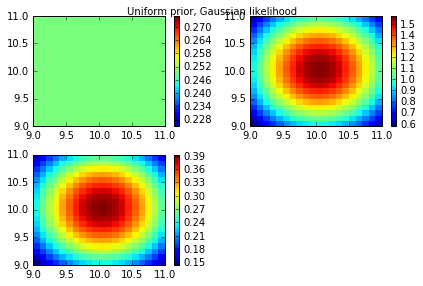

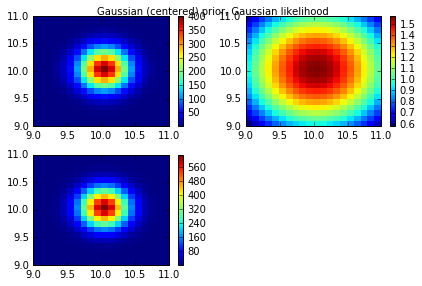

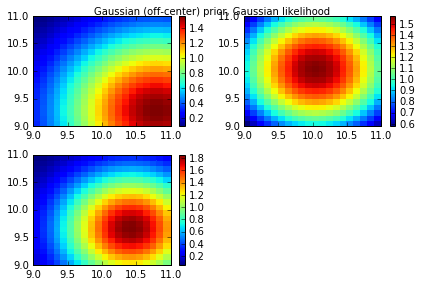

In [8]:
min_mass, max_mass = 9, 11
step = 0.1

def likelihood_fcn(m1, m2, m1_t=10, m2_t=10, sigma_1=1, sigma_2=1):
    return numpy.exp( -(m1-m1_t)**2/2 / sigma_1**2 -(m2-m2_t)**2/2 / sigma_2**2 ) / 2*numpy.pi / sigma_1**2 / sigma_2**2

def uniform_prior(m1, m2):
    return 1.0/(min_mass-max_mass)**2

prior, posterior, likelihood = [], [], []
for m1p in numpy.mgrid[min_mass:max_mass+step:step]:
    for m2p in numpy.mgrid[min_mass:max_mass+step:step]:
        like = likelihood_fcn(m1p, m2p)
        pri = uniform_prior(m1p, m2p)
        prior.append(pri)
        likelihood.append(like)
        posterior.append(like * pri)

X, Y = numpy.meshgrid(numpy.mgrid[min_mass:max_mass+step:step], numpy.mgrid[min_mass:max_mass+step:step])
subplot(2, 2, 1)
pcolor(Y, X, numpy.array(prior).reshape(X.shape).T)
colorbar()
subplot(2, 2, 2)
pcolor(Y, X, numpy.array(likelihood).reshape(X.shape).T)
colorbar()
subplot(2, 2, 3)
pcolor(Y, X, numpy.array(posterior).reshape(X.shape).T)
colorbar()
suptitle("Uniform prior, Gaussian likelihood")
tight_layout();

# Let's assume we know a bit better where the signal is located
def g_prior(m1, m2, m1_off, m2_off, m1_sig, m2_sig):
    return likelihood_fcn(m1, m2, m1_off, m2_off, m1_sig, m2_sig)

prior, posterior, likelihood = [], [], []
for m1p in numpy.mgrid[min_mass:max_mass+step:step]:
    for m2p in numpy.mgrid[min_mass:max_mass+step:step]:
        like = likelihood_fcn(m1p, m2p)
        pri = g_prior(m1p, m2p, 10, 10, 0.25, 0.25)
        prior.append(pri)
        likelihood.append(like)
        posterior.append(like * pri)

figure()
X, Y = numpy.meshgrid(numpy.mgrid[min_mass:max_mass+step:step], numpy.mgrid[min_mass:max_mass+step:step])
subplot(2, 2, 1)
pcolor(Y, X, numpy.array(prior).reshape(X.shape).T)
colorbar()
subplot(2, 2, 2)
pcolor(Y, X, numpy.array(likelihood).reshape(X.shape).T)
colorbar()
subplot(2, 2, 3)
pcolor(Y, X, numpy.array(posterior).reshape(X.shape).T)
colorbar()
suptitle("Gaussian (centered) prior, Gaussian likelihood")
tight_layout();

# Now assume our belief is biased away from the true value
prior, posterior, likelihood = [], [], []
for m1p in numpy.mgrid[min_mass:max_mass+step:step]:
    for m2p in numpy.mgrid[min_mass:max_mass+step:step]:
        like = likelihood_fcn(m1p, m2p)
        pri = g_prior(m1p, m2p, 9.25, 10.75, 1.0, 1.0)
        prior.append(pri)
        likelihood.append(like)
        posterior.append(like * pri)

figure()
X, Y = numpy.meshgrid(numpy.mgrid[min_mass:max_mass+step:step], numpy.mgrid[min_mass:max_mass+step:step])
subplot(2, 2, 1)
pcolor(Y, X, numpy.array(prior).reshape(X.shape).T)
colorbar()
subplot(2, 2, 2)
pcolor(Y, X, numpy.array(likelihood).reshape(X.shape).T)
colorbar()
subplot(2, 2, 3)
pcolor(Y, X, numpy.array(posterior).reshape(X.shape).T)
colorbar()
suptitle("Gaussian (off-center) prior, Gaussian likelihood")
tight_layout();


Side note: Up to this point, I've not drawn a distinction between probabilities (e.g. distinct values) and probability densities (e.g histograms and functions). Bayes' Law works for both, and I implicitly meant probability density as soon as I started talking about parameter estimation. The difference was not important then, but it is now since we will discuss *sampling* those distributions.

## Monte Carlo Integration

The *computational* problem of Bayesian inference tends to boil down into how well you can evaluate your likelihood and then integrate the evidence to normalize the posterior. In the case where the number of dimensions you have is small (e.g. $\lesssim 4$), then you can probably employ a grid based strategy of numerical evaluation and integration. However, this quickly becomes unmanageable when the number of dimensions (the dimensionality of $\vec{\mu}$ grows large. For example, in even the most basic inspiral parameter analysis, $\vec{\mu}$ has at least 8 parameters to determine. Integrating that in a straight up grid to *any* accuracy would take a lot longer than one wants to wait.

The solution is a Monte Carlo integration. Monte Carlo integration, when well posed, has an upper bound on the rate of convergence which scales with $\sqrt{N}$, with $N$ being the number of points used to evaluate the integral. If the space of the integrand is highly peaked (as it can be in our analyses), you *will* end up drawing many points with little or no support in the posterior. However, if the choice of how the poitns are distributed is made smartly, the convergence can be much faster then $\sqrt{N}$.

### Markov Chain Monte Carlo

One strategy in speeding up convergence is particularly elegant: a Markov Chain Monte Carlo takes the Bayesian procedure one step further. Markov Chains allow one, when constructed well, to sample the space of the posterior efficiently. The sampler is walking around in the space and making jumps based on the shape of the posterior in the nearby vicinity. This allows one to efficiently jump around *and* sample the posterior at the same time. This is an intuitive way of thinking of the problem. Your random process is drawing a set of parameters, evaluating its likelihood and multiplying by the prior, giving you a weighted point estimate of the posterior. As you accumulate samples, the sampled distribution begins to resemble the posterior and eventually, the samples one draws are *exclusively* from the posterior distribution. Once you've determined this condition, the Monte Carlo ends and you have a posterior distributiuon from the samples you've drawn. The trick is to determine the method by which you guarantee that your process converges to the posterior. One such method is called the Metropolis-Hastings method.

#### Metropolis-Hastings Sampling

1. Pick a point in your region of interest, in our case, we have a prior belief about the shape of the distribution, so it's natural to pick a point drawn from the prior.
2. Evaluate the posterior at this point
3. Select the next point based on a selection criteria (call it $Q(x_{i+1})/Q(x_i)$ --- this is typically some symmetric and local distribution centered on the current point (e.g. a Gaussian).
4. Compute a new posterior value for this proposal and compare it to the current posterior point. If the ratio is above one, then this value is 'more likely" and one jumps to that point. If it's below one, accept with probability equal to the ratio.
5. Repeat ad nauseum -- until one has enough points to properly resolve the posterior.

These sequence of point, jump, point, jumps are called chains, and they obey a set of conditions which a deemed 'Markovian', hence they are Markov chains.

There's a trick here, though. This only works if your sample distribution resembles the *true* posterior. That is to say, you only can calculate the posterior if you know the shape of the posterior! Okay, not so useful. However, we can relax the condition on (3) above and instead of comparing $p(x_{i+1})/p(x_i)$, we compare the ratio $p(x_{i+1})/p(x_i)q(x_{i+1}|x_i)/q(x_i|x_{i+1})$. Nominally, the distribution was symmetric and right hand ratio was 1. As long as the ratio used in the acceptance criteria probability follows this condition ($\min(1, r)$) then we are guaranteed to eventually converge, this is called "detailed balance".

If we instead use the likelihood as a surrogate for $Q$ we can start to map out the places where, if we were to jump, the we'd (probably) find that the likelihood is larger. So, of course, given that the priors are fixed, we know we're exploring a region of the parameter space where the integrand is larger. However, we can not use these samples (called ''burn-in''), since they don't meet the strict conditions of Metropolis-Hastings method. However, they do give us a rough shape of the posterior, and that's what we need to perform the MH method in its fullness.

> Example: Metropolis-Hastings method with MC Integration
>
> You can (and should) play around with the width of the Gaussian. You'll find that the sharper you make the peak, the longer you
> have to search to find it. If you expand or contract the x_min and x_max, you should also find that convergence speeds up or slows
> down since the parameter space widens relative to the width of the integrand.

1.0
0.836554497155
1.0


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars


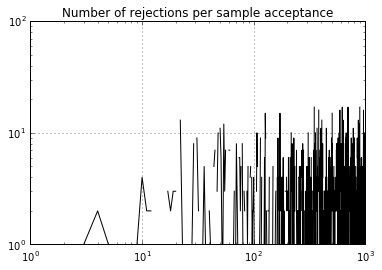

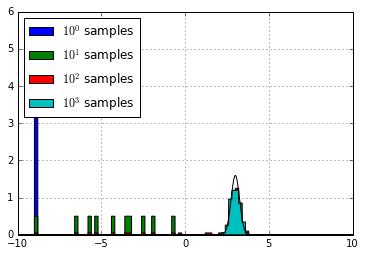

In [9]:
def gaussian(x, mu, sig):
    return 1 / numpy.sqrt(2 * numpy.pi * sig**2) * numpy.exp( -(x-mu)**2/2/sig**2 )
                                                  
def integrand(x):
    return gaussian(x, 3, 0.25)
    
x_min, x_max = -10, 10

# Call the prior uniform
i, j = 0, 0
# Initial point, uncommnet for random
#x_i = numpy.random.uniform(x_min, x_max)
# start far away for funsies
x_i = -9
samples = [x_i]
n_rej = []
while i < 1000:
    x_prop = numpy.random.normal(x_i, 1.0)
    ratio = integrand(x_prop)/integrand(x_i)
    if ratio > numpy.random.uniform(0, 1):
        i += 1
        x_i = x_prop
        samples.append(x_prop)
        n_rej.append(j)
        j = 0
        continue
    j += 1

figure()
plot(n_rej, 'k-')
loglog()
grid()
title("Number of rejections per sample acceptance")
        
figure()
for i in range(4):
    h, b, _ = hist(samples[:10**i], range=(-10, 10), bins=100, histtype='stepfilled', normed=True, label = ("$10^%d$ samples" % i))

x = numpy.linspace(-10, 10, 1000)
plot(x, integrand(x), 'k-')
legend(loc="upper left")
grid()


# By the way the answer to the integral
print h.sum() * (b[1] - b[0])
# The answer for a naive MC integrator -- the variance on this answer is much higher than the MCMC or gridded method answer
# You may get close to the right answer, but the accuracy will be much worse for fixed N.
# Try this several times and see if the answer varies a lot (relative to the MCMC answer, anyway)
print numpy.average(integrand(numpy.random.uniform(-10, 10, 1000))) * (x_max - x_min)
# Compare
print integrand(x).sum() * (x[1] - x[0])

Note that the answer is not as accurate as the gridded method. We spoke not of *accuracy* only convergence. Our original supposition, however, was that we were doing a high dimensional integral, and for a fixed accuracy target, we'd have to grid up *many* more points for a high dimensional integral than for an MC integral.

> Example: Two dimension MCMC
>
> Same as before, but the differece between gridding and MCMC methods is becoming more apparent. You need many more samples to get
> a similar accuracy, but the grid method is growing now as $N^2$ evaluations. Imagine as the square becomes a cube, quartic, etc...

1.0
1.13096428828
0.999808852852


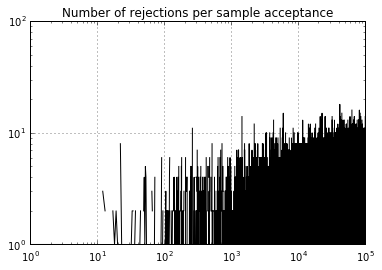

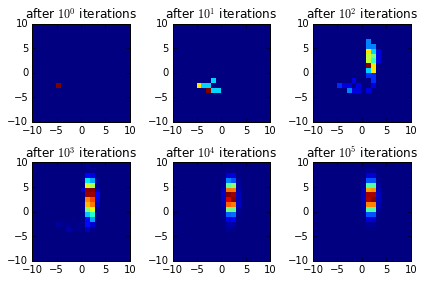

In [10]:
def integrand(x, y):
    return gaussian(x, 3, 2)*gaussian(y, 2, 0.5)
    
x_min, x_max = -10, 10
y_min, y_max = -10, 10

# Call the prior uniform
i, j = 0, 0
# Uncomment to start somewhere random
#x_i, y_i = numpy.random.uniform(x_min, x_max), numpy.random.uniform(y_min, y_max)
# start somewhere far off
x_i, y_i = -3, -5
samples = [(x_i, y_i)]
n_rej = []

while i < 100000:
    x_prop = numpy.random.normal(x_i, 1.0)
    y_prop = numpy.random.normal(y_i, 1.0)
    ratio = integrand(x_prop, y_prop)/integrand(x_i, y_i)
    if ratio > numpy.random.uniform(0, 1):
        i += 1
        x_i, y_i = x_prop, y_prop
        samples.append((x_prop, y_prop))
        n_rej.append(j)
        j = 0
        continue
    j += 1
    
figure()
plot(n_rej, 'k-')
loglog()
grid()
title("Number of rejections per sample acceptance")

figure()
samples = numpy.array(samples).T
for i in range(6):
    h, xb, yb = numpy.histogram2d(samples[0,:10**i], samples[1,:10**i], 
                                  range=((x_min, x_max), (y_min, y_max)), bins=(20, 20), normed=True)
    subplot(2, 3, i+1)
    pcolor(xb, yb, h)
    title("after $10^%d$ iterations" % i)

tight_layout()

# By the way the answer to the integral
print h.sum() * (xb[1] - xb[0]) * (yb[1] - yb[0])

# The answer for a naive MC integrator -- the variance on this answer is much higher than the MCMC or gridded method answer
# You may get close to the right answer, but the accuracy will be much worse for fixed N.
# Try this several times and see if the answer varies a lot (relative to the MCMC answer, anyway)
print numpy.average(integrand(numpy.random.uniform(x_min, x_max, 1000), numpy.random.uniform(y_min, y_max, 1000))) * (x_max - x_min) * (y_max - y_min)

# Compare gridded
import itertools
x = numpy.linspace(x_min, x_max, 100)
y = numpy.linspace(y_min, y_max, 100)
intgrl = [integrand(xi, yi) for (xi, yi) in itertools.product(x,y)]
print numpy.sum(intgrl) * (x[1] - x[0]) * (y[1] - y[0])